In [2]:
import matplotlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier    


In [3]:
data=pd.read_csv(r"C:\Users\PMLS\Downloads\thyroidDF.csv")
data



,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,NaN,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,NaN,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,NaN,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,NaN,other,-,870119027


In [4]:
data.fillna(0)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,0.0,f,0.00,f,0.0,f,0.0,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,0.00,f,0.0,f,0.0,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,0.0,f,0.00,f,0.0,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,0.0,f,0.00,f,0.0,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,0.0,f,0.00,f,0.0,t,36.0,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,0.0,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,0.0,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,0.0,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,0.0,other,-,870119027


In [5]:
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target', 'patient_id'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder
l= LabelEncoder()
data['sex']=l.fit_transform(data['sex'])
data['sex']

0       0
1       0
2       0
3       0
4       0
       ..
9167    1
9168    1
9169    1
9170    0
9171    1
Name: sex, Length: 9172, dtype: int32

In [7]:
data=data.drop(columns=['on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
    ])

In [8]:
data.columns

Index(['age', 'sex', 'target', 'patient_id'], dtype='object')

<BarContainer object of 9172 artists>

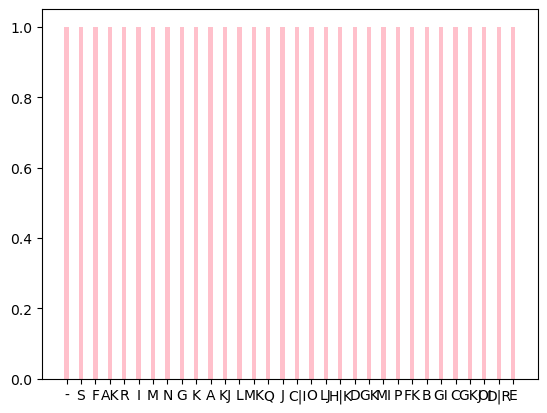

In [9]:
outcome=data['target']
plt.bar(outcome, height=1, width=0.3, color='pink')

In [10]:
x=data.drop('target', axis=1)
y=data['target']
y

0       -
1       -
2       -
3       -
4       S
       ..
9167    -
9168    -
9169    I
9170    -
9171    -
Name: target, Length: 9172, dtype: object

In [11]:

y=l.fit_transform(y)
y


array([ 0,  0,  0, ..., 16,  0,  0])

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [13]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

var=model.predict(x_test)
var

array([18,  1, 18, ...,  0,  0,  0])

In [14]:
from sklearn import tree
clf=tree.DecisionTreeClassifier()
clf=clf.fit(x_train, y_train)
clf

DecisionTreeClassifier()

In [15]:
pred=clf.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, pred)
print('The accuracy of Chambal model is: ', acc)

The accuracy of Chambal model is:  0.5694822888283378


In [17]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75      1328
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           9       0.05      0.05      0.05        40
          10       0.00      0.00      0.00         1
          11       0.03      0.04      0.04        69
          12       0.00      0.00      0.00         1
          13       0.11      0.17      0.13         6
          16       0.13      0.10      0.11        82
          17       0.00      0.00      0.00        12
          18       0.14      0.11      0.12       106
          19       0.00      0.00      0.00         2
          20       0.00      0.00      0.00        28
          22       0.00      0.00      0.00        25
          24       0.00    

c:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\metrics\_classif

<BarContainer object of 9172 artists>

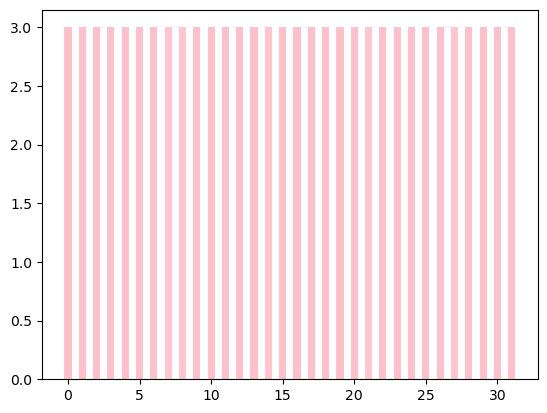

In [19]:
import matplotlib.pyplot as plt
plt.bar(y, height=3, width=0.5,color='pink',alpha=0.9)

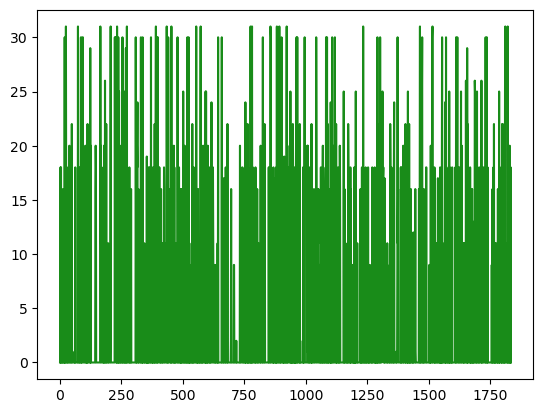

In [20]:
#plt.bar(y_test, height=3, width=0.5)
plt.plot(y_test,color='green',alpha=0.9)

In [21]:
from sklearn import svm
s=svm.SVC(decision_function_shape='ovo', C=1,kernel='linear', gamma='auto')
s.fit(x_train, y_train)

In [ ]:
pred1=s.predict(x_test)
pred1

In [ ]:
acc2=accuracy_score(y_test, pred1)
print('The accuraccy of Chambal_2.0 model is :', acc2)

In [ ]:

print(classification_report(y_test,pred1))

In [ ]:
from sklearn.metrics import confusion_matrix as cm
cm=cm(y_test, pred1,labels=[0,1])
cm

In [ ]:
from sklearn.metrics import confusion_matrix as cm
cm=cm(y_test, pred,labels=[0,1])
cm

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels=['Cammeo', 'Osmancik']
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='CMRmap')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=10)
clf=clf.fit(x_train, y_train)
clf

In [ ]:
pred=clf.predict(x_test)

In [ ]:
acc2=accuracy_score(y_test, pred)
print('The accuraccy of Chambal_2.0 model is :', acc2)

NameError: name 'accuracy_score' is not defined